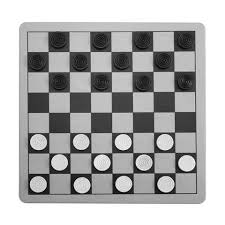

In [ ]:
#Importing neccessory libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/My Drive/Image_inpainting/board.jpg',0)
cv2_imshow(img)

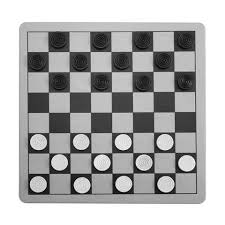

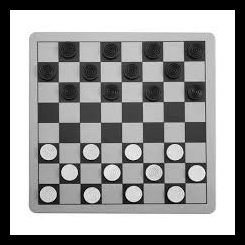

In [ ]:
#function for padding the image
def zero_pad(I,pad):
  I_pad=np.pad(I,((pad,pad),(pad,pad)),mode='constant',constant_values=(0,0))
  return I_pad
k=zero_pad(img,10)

cv2_imshow(img)
cv2_imshow(k)

In [ ]:
#convolution step
def conv_single_step(slice_,filter):
  s=slice_*filter
  Z=np.sum(s)
  return Z

In [ ]:
def convolution(I,filter,stride,pad):
  m,n=I.shape
  #shape of filter
  p,q=filter.shape
  #dimemsions_of output matrix
  m1=int((m+2*pad-p)/stride)+1
  n1=int((n+2*pad-q)/stride)+1

  #initialiaze the output matrix
  output_img=np.zeros((m1,n1))

  if pad!=0:
    I=zero_pad(I,pad)
  
  for i in range (m1):
    for j in range (n1):
      vert_start=i*stride
      vert_end=vert_start+p
      horiz_start=j*stride
      horiz_end=horiz_start+q
      i_slice=I[vert_start:vert_end,horiz_start:horiz_end]
      output_img[i,j]=conv_single_step(i_slice,filter)
  return output_img

>>>Step1 : Denoising using Gaussian blur and finding the derivatives  
i.e Finding Sobel_X and Sobel_Y

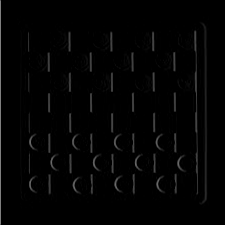

In [ ]:

patch=[[-1,0,1],[-2,0,2],[-1,0,1]]  #sobel X filter
patch=1/8*np.array(patch)
sobel_X=convolution(img,patch,1,1) #with stride=1 and pad=1
cv2_imshow(sobel_X)


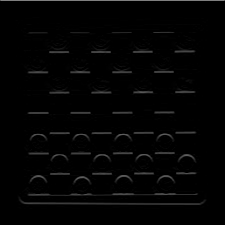

In [ ]:
patch=[[-1,-2,-1],[0,0,0],[1,2,1]]  #sobel Y filter
patch=1/8*np.array(patch)
sobel_Y=convolution(img,patch,1,1) #with stride=1 and pad=1
cv2_imshow(sobel_Y)

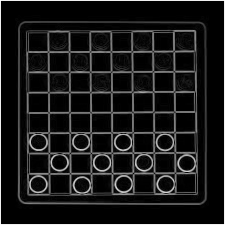

In [ ]:

sobel_grad=np.hypot(sobel_X,sobel_Y)  #magnitude 
sobel_grad=sobel_grad/sobel_grad.max() * 255
cv2_imshow(sobel_grad)


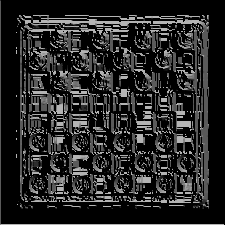

In [ ]:

sobel_angle=np.degrees(np.arctan2(sobel_X,sobel_Y))
cv2_imshow(sobel_angle)

>>>Finding Laplacian of the image

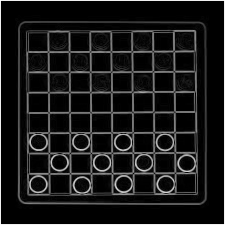

In [ ]:
patch=[[0,1,0],[1,-4,1],[0,1,0]]  #LAplacian filter
patch=np.array(patch)
Laplacian=convolution(sobel_grad,patch,1,1)
Laplacian=np.uint8(Laplacian)
Laplacian=np.copy(sobel_grad)

cv2_imshow(Laplacian)

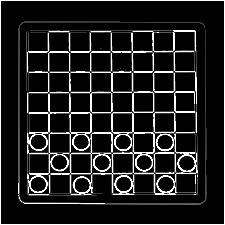

In [ ]:
#Hysteresis

LT=50
UT=100

s=Laplacian.shape
for i in range(s[0]):
  for j in range(s[1]):
    if Laplacian[i][j]<LT:
      Laplacian[i][j]=0
    elif Laplacian[i][j]>UT:
      Laplacian[i][j]=255
    else:
      if i<s[0]-2 or j<s[1]-2:
        pass
      elif ((Laplacian[i-1,j-1] > UT) or 
        (Laplacian[i-1,j] > UT) or
        (Laplacian[i-1,j+1] > UT) or
        (Laplacian[i,j-1] > UT) or
        (Laplacian[i,j+1] > UT) or
        (Laplacian[i+1,j-1] > UT) or
        (Laplacian[i+1,j] >UT) or
        (Laplacian[i+1,j+1] > UT)):
            Laplacian[i,j] = 255
canny_edges=np.copy(Laplacian)
cv2_imshow(canny_edges)